In [1]:
library(tidyverse)
library(feather)
library(plotly)
library(caret)
library("ggmap")
library(maptools)
library(maps)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'ggmap' was built under R version 3.3.3"
Attaching package: 'ggmap'

The following object is masked from 'package:plotly':

    wind

Warning message:
"package 'maptools' was built under R version 3.3.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.3.3"Checking rgeos availability: FALSE
 

In [2]:
transactions <- feather::read_feather('..\\..\\Data\\Datathon_2017\\Transactions_Frame')

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [3]:
ATC_Lookup <- feather::read_feather('..\\..\\Data\\Datathon_2017\\ATC_Lookup')
ChronicIllness_LookUp <- feather::read_feather('..\\..\\Data\\Datathon_2017\\ChronicIllness_LookUp')
Drug_LookUp <- feather::read_feather('..\\..\\Data\\Datathon_2017\\Drug_LookUp')
patients <- feather::read_feather('..\\..\\Data\\Datathon_2017\\patients')
stores <- feather::read_feather('..\\..\\Data\\Datathon_2017\\stores')

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [5]:
getPostCode <- function(postcode){

    visited <- c(paste("Australia",postcode,sep = ""))
    ll.visited <- geocode(visited)
    visit.x <- ll.visited$lon
    visit.y <- ll.visited$lat
    return(c(visit.x,visit.y))
    
    }

In [7]:
postcodes <- read.csv('..\\..\\Data\\Datathon_2017\\Australian_Post_Codes_Lat_Lon.csv')

In [7]:
getPostCode("3168")[2]

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Australia3168&sensor=false


[1] -37.9212

In [4]:
patient_ids <- transactions %>% select(Patient_ID) %>% unique
sample_patient_id_ix <- sample(1:nrow(patient_ids))[1:(0.10*nrow(patient_ids))]
sample_patient_ids <- patient_ids[sample_patient_id_ix,]

In [5]:
transactions <- transactions %>% filter(Patient_ID %in% sample_patient_ids$Patient_ID)

In [8]:
antibiotic_transactions <- transactions %>% 
    left_join(patients, by='Patient_ID') %>% 
    left_join(postcodes %>% group_by(postcode) %>%
                summarise(lat = mean(lat),
                  long = mean(lon))
        , by='postcode') %>% 
    left_join(., Drug_LookUp, by = c('Drug_ID'='MasterProductID')) %>%
    left_join(., ATC_Lookup, by = 'ATCLevel5Code') %>% 
    filter(stringr::str_detect(stringr::str_to_lower(ATCLevel2Name),pattern='antibacterial'))

In [12]:
antibiotic_transactions %>% head(3)

Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,...,ATCLevel1Code.x,ATCLevel1Code.y,ATCLevel1Name,ATCLevel2Code.y,ATCLevel2Name,ATCLevel3Code.y,ATCLevel3Name,ATCLevel4Code.y,ATCLevel4Name,ATCLevel5Name
309,2315,2644,223,F,2010-11-21,2011-01-16,AKAM1,1616C,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,MINOCYCLINE
309,2315,2644,223,F,2011-03-27,2011-05-15,AKAM1,1616C,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,MINOCYCLINE
309,2315,2644,223,F,2011-03-27,2011-06-12,AKAM1,1616C,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,MINOCYCLINE


In [13]:
antibiotic_transactions %>% names

[1] "Patient_ID"               "Store_ID"                
 [3] "Prescriber_ID"            "Drug_ID"                 
 [5] "SourceSystem_Code"        "Prescription_Week"       
 [7] "Dispense_Week"            "Drug_Code"               
 [9] "NHS_Code"                 "IsDeferredScript"        
[11] "Script_Qty"               "Dispensed_Qty"           
[13] "MaxDispense_Qty"          "PatientPrice_Amt"        
[15] "WholeSalePrice_Amt"       "GovernmentReclaim_Amt"   
[17] "RepeatsTotal_Qty"         "RepeatsLeft_Qty"         
[19] "StreamlinedApproval_Code" "gender"                  
[21] "year_of_birth"            "postcode"                
[23] "lat"                      "long"                    
[25] "MasterProductCode"        "MasterProductFullName"   
[27] "BrandName"                "FormCode"                
[29] "StrengthCode"             "PackSizeNumber"          
[31] "GenericIngredientName"    "EthicalSubCategoryName"  
[33] "EthicalCategoryName"      "ManufacturerCode"        
[35] "ManufacturerName"         "ManufacturerGroupID"     
[37] "ManufacturerGroupCode"    "ChemistListPrice"        
[39] "ATCLevel5Code"            "ATCLevel4Code.x"         
[41] "ATCLevel3Code.x"          "ATCLevel2Code.x"         
[43] "ATCLevel1Code.x"          "ATCLevel1Code.y"         
[45] "ATCLevel1Name"            "ATCLevel2Code.y"         
[47] "ATCLevel2Name"            "ATCLevel3Code.y"         
[49] "ATCLevel3Name"            "ATCLevel4Code.y"         
[51] "ATCLevel4Name"            "ATCLevel5Name"

In [33]:
antibiotic_transactions %>% 
mutate(Prescription_Week = as.Date(Prescription_Week)) %>%
filter(Prescription_Week > as.Date('2013-04-28')) %>%
arrange(Prescription_Week)

Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,...,ATCLevel1Code.x,ATCLevel1Code.y,ATCLevel1Name,ATCLevel2Code.y,ATCLevel2Name,ATCLevel3Code.y,ATCLevel3Name,ATCLevel4Code.y,ATCLevel4Name,ATCLevel5Name
2942,1819,61161,4559,F,2013-05-05,2013-06-02,KEF1,3058Y,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01D,OTHER BETA-LACTAM ANTIBACTERIALS,J01DB,FIRST-GENERATION CEPHALOSPORINS,CEFALEXIN
2942,1819,61161,4559,F,2013-05-05,2013-06-23,KEF1,3058Y,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01D,OTHER BETA-LACTAM ANTIBACTERIALS,J01DB,FIRST-GENERATION CEPHALOSPORINS,CEFALEXIN
104042,856,42597,1694,F,2013-05-05,2013-05-26,CILE2,3119E,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01D,OTHER BETA-LACTAM ANTIBACTERIALS,J01DB,FIRST-GENERATION CEPHALOSPORINS,CEFALEXIN
104042,856,42597,1694,F,2013-05-05,2013-06-16,CILE2,3119E,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01D,OTHER BETA-LACTAM ANTIBACTERIALS,J01DB,FIRST-GENERATION CEPHALOSPORINS,CEFALEXIN
104042,856,42597,1694,F,2013-05-05,2013-07-07,CILE2,3119E,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01D,OTHER BETA-LACTAM ANTIBACTERIALS,J01DB,FIRST-GENERATION CEPHALOSPORINS,CEFALEXIN
111563,2392,50804,2694,F,2013-05-05,2013-12-29,DOR7,2707L,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,DOXYCYCLINE
116636,1798,0,9556,F,2013-05-05,2013-06-09,MPDO1,2707L,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,DOXYCYCLINE
116636,1798,0,9556,F,2013-05-05,2013-07-07,MPDO1,2707L,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,DOXYCYCLINE
116636,1798,0,9556,F,2013-05-05,2013-08-04,MPDO1,2707L,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,DOXYCYCLINE
132489,307,27032,2720,F,2013-05-05,2013-06-02,DOXY13,9106G,0,...,J,J,ANTIINFECTIVES FOR SYSTEMIC USE,J01,ANTIBACTERIALS FOR SYSTEMIC USE,J01A,TETRACYCLINES,J01AA,TETRACYCLINES,DOXYCYCLINE


In [42]:
#Using GGPLOT, plot the Base World Map
mp <- NULL
mapWorld <- borders("world2", colour="gray50") # create a layer of borders
mp <- ggplot() + mapWorld + xlim(110, 157) + ylim(-44,-10)
#mp
#Now Layer the cities on top
#mp <- mp+ geom_point(aes(x=visit.x, y=visit.y) ,color="blue", size=3) 
#mp

In [48]:
addWeeks <- function(x){
    return(as.Date('2013-04-28') + lubridate::weeks(x))
}

In [70]:
lapply(X = 1:5, addWeeks)

[[1]]
[1] "2013-05-05"

[[2]]
[1] "2013-05-12"

[[3]]
[1] "2013-05-19"

[[4]]
[1] "2013-05-26"

[[5]]
[1] "2013-06-02"

In [68]:
PlotAntibioticDensityForWeek <- function(date){
    #Sys.sleep(2)
    return(
    antibiotic_transactions %>% 
    mutate(Prescription_Week = as.Date(Prescription_Week)) %>%
    filter(Prescription_Week == as.Date(date)) %>%
    ggplot(aes(long, lat)) + mapWorld + stat_density2d(aes(alpha=..level..), geom="polygon") +
          scale_alpha_continuous(limits=c(0,0.2),breaks=seq(0,0.2,by=0.025))+
          geom_point(colour="red",alpha=0.02)+
          theme_bw() + xlim(110, 157) + ylim(-44,-10)
    )
}

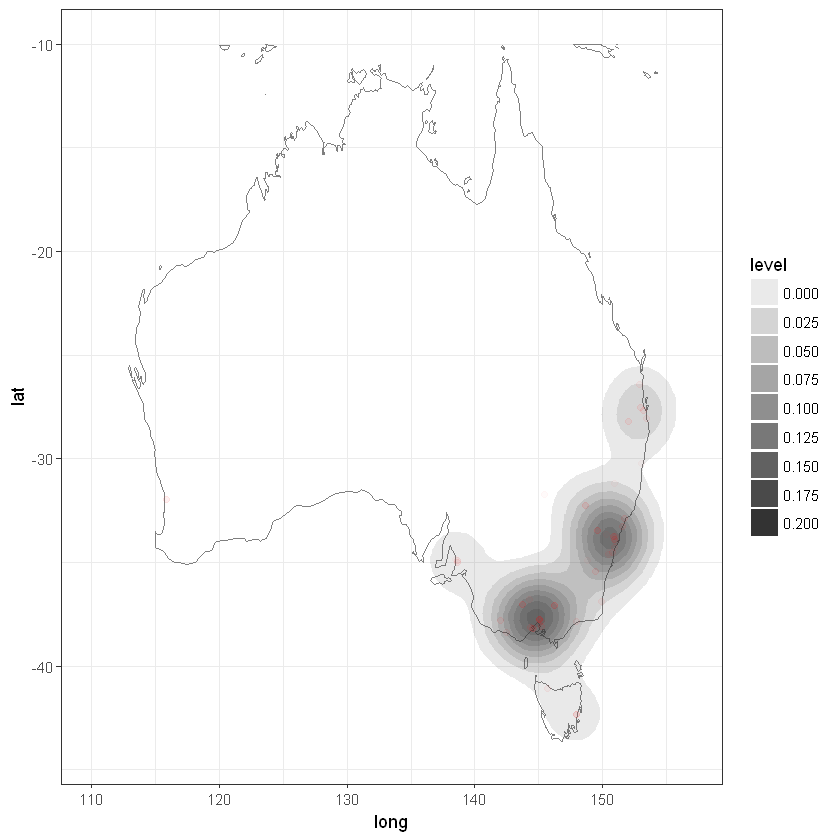

In [69]:
PlotAntibioticDensityForWeek('2013-06-02')

# 6 months worth of density plots...

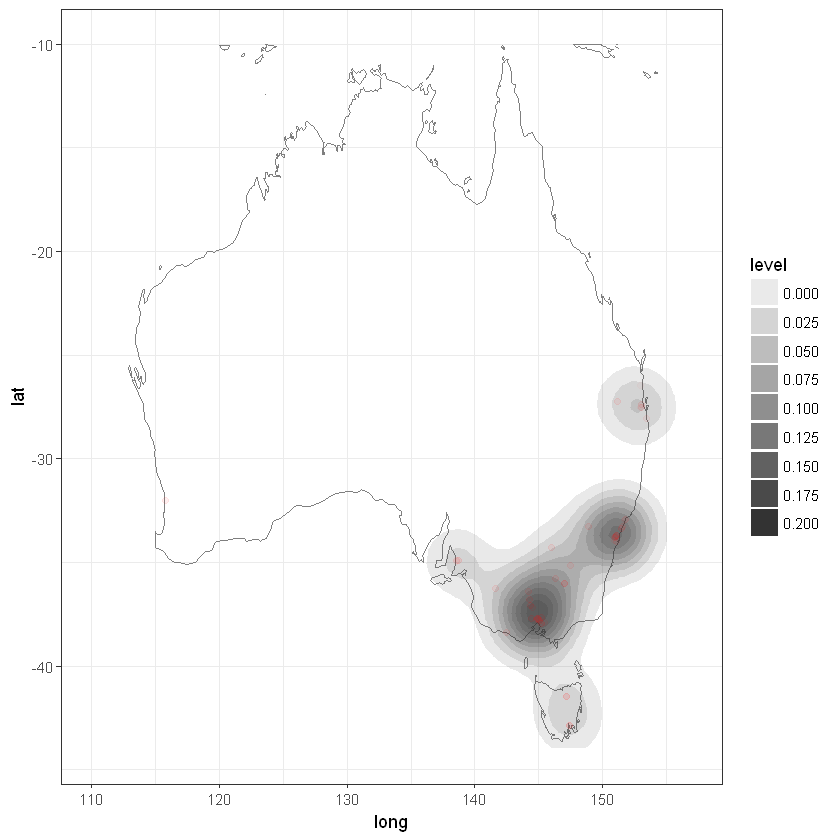

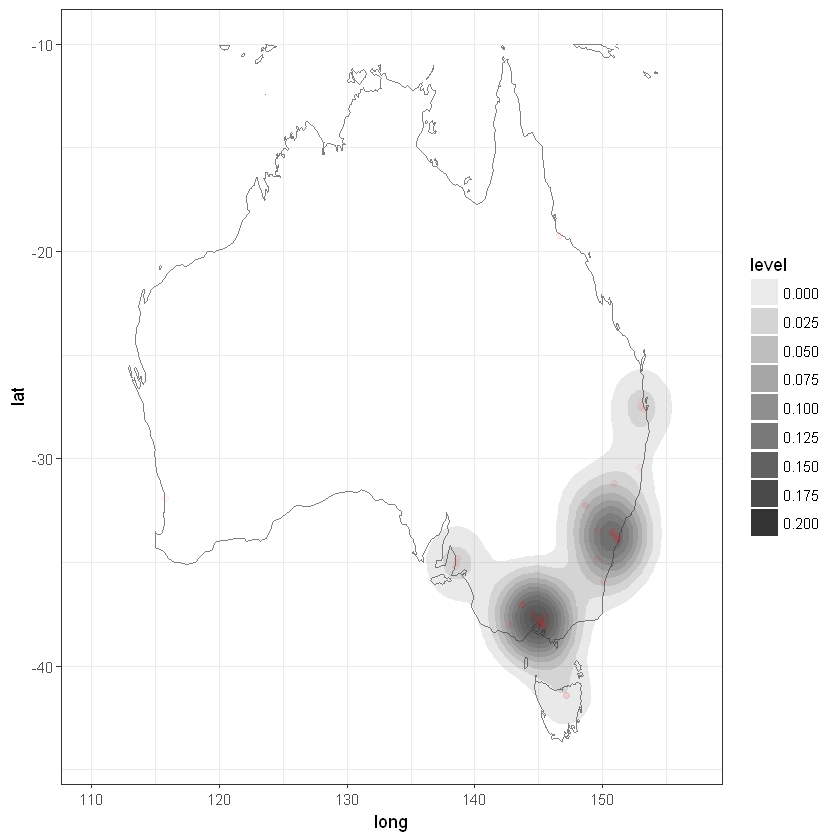

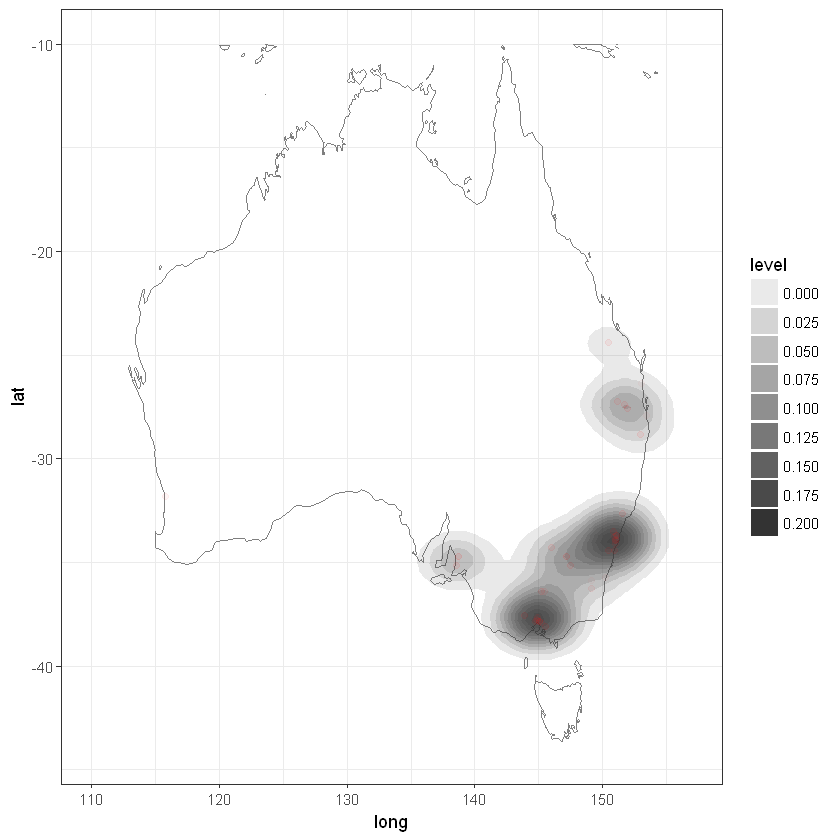

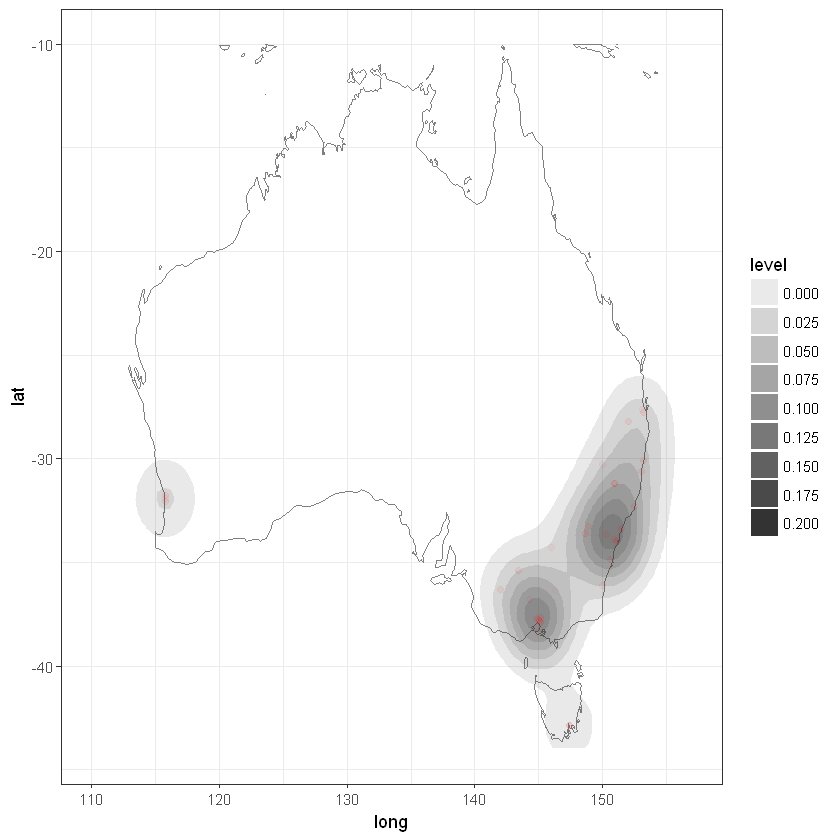

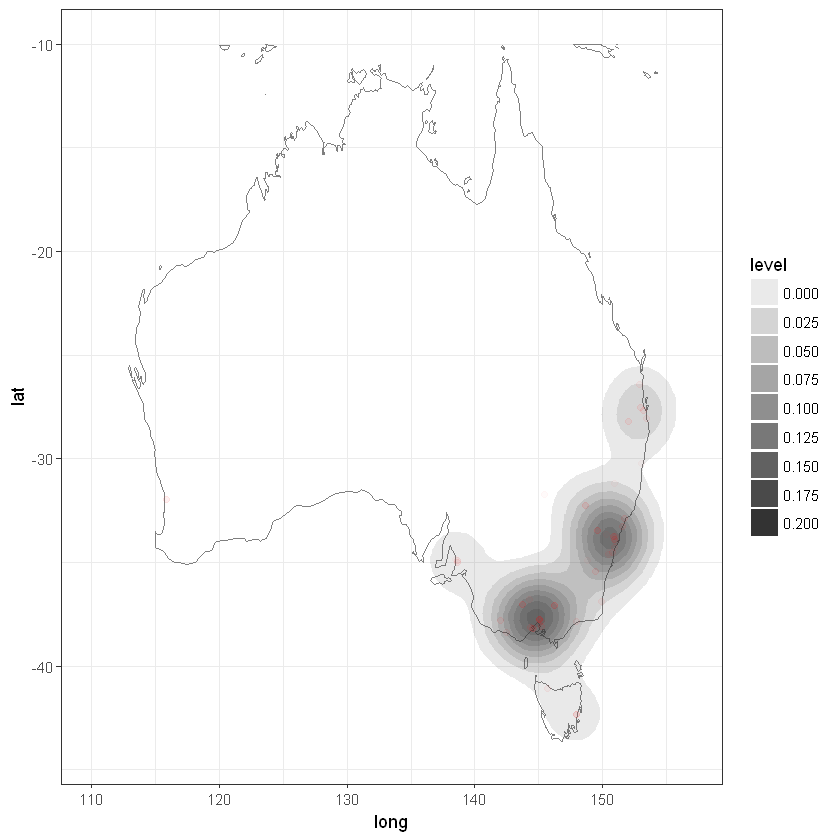

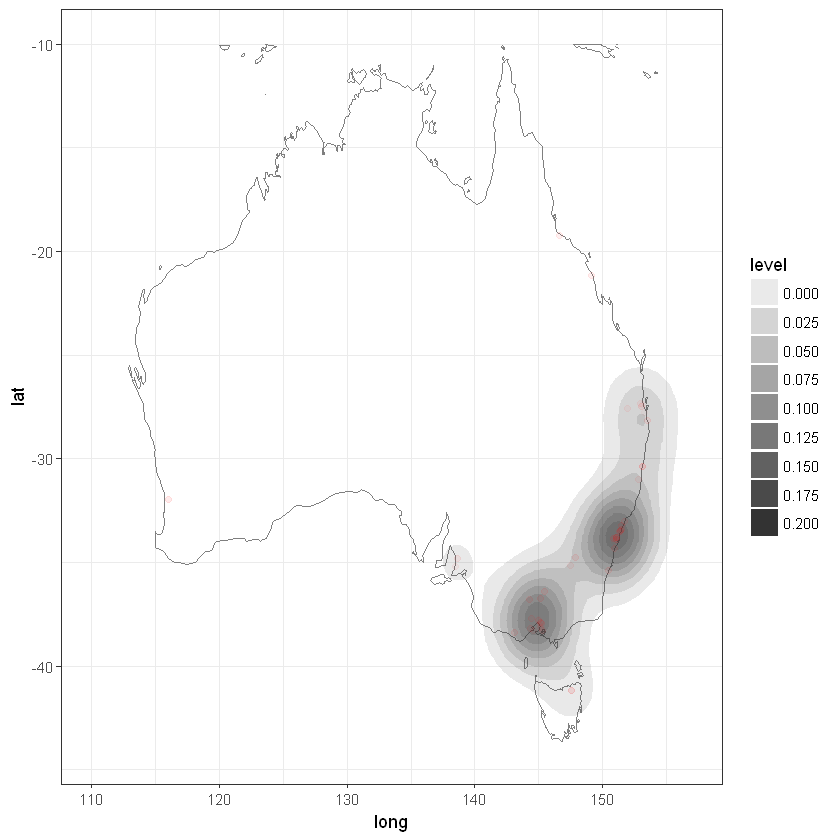

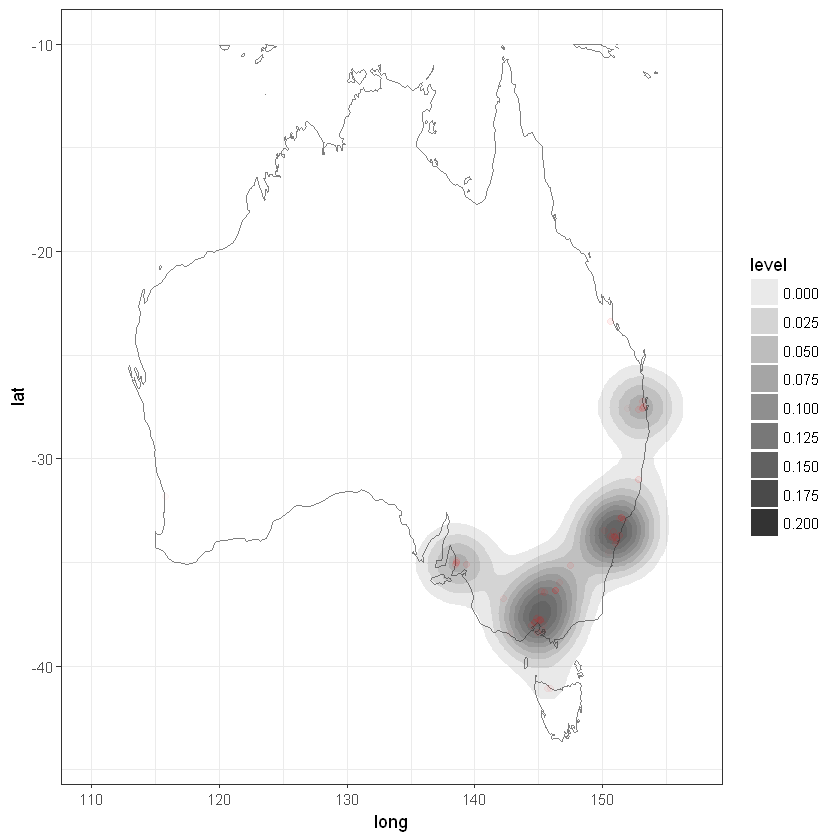

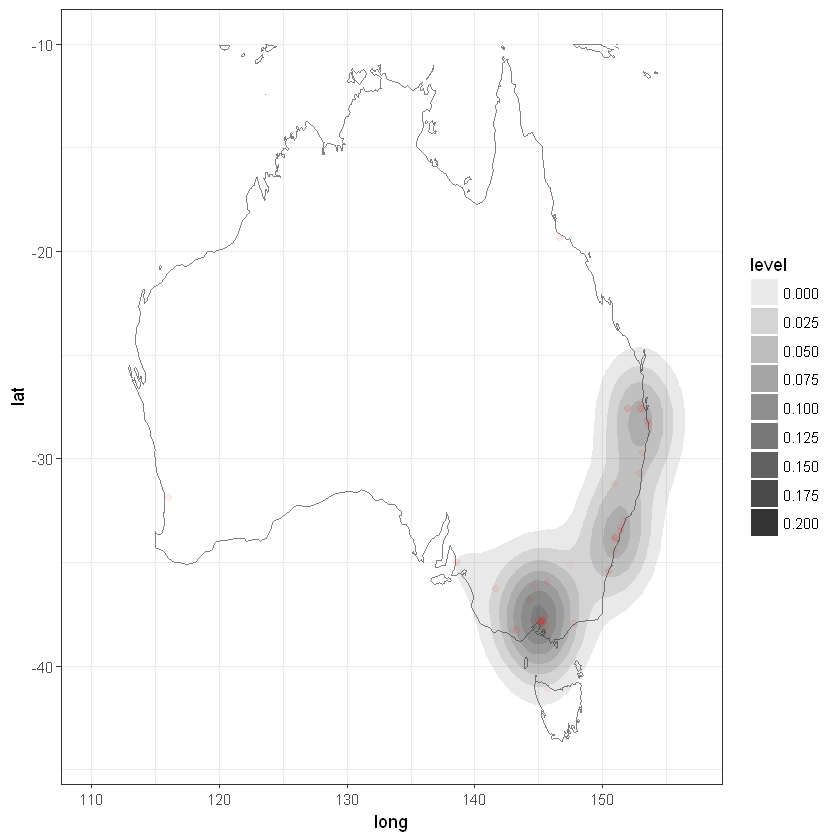

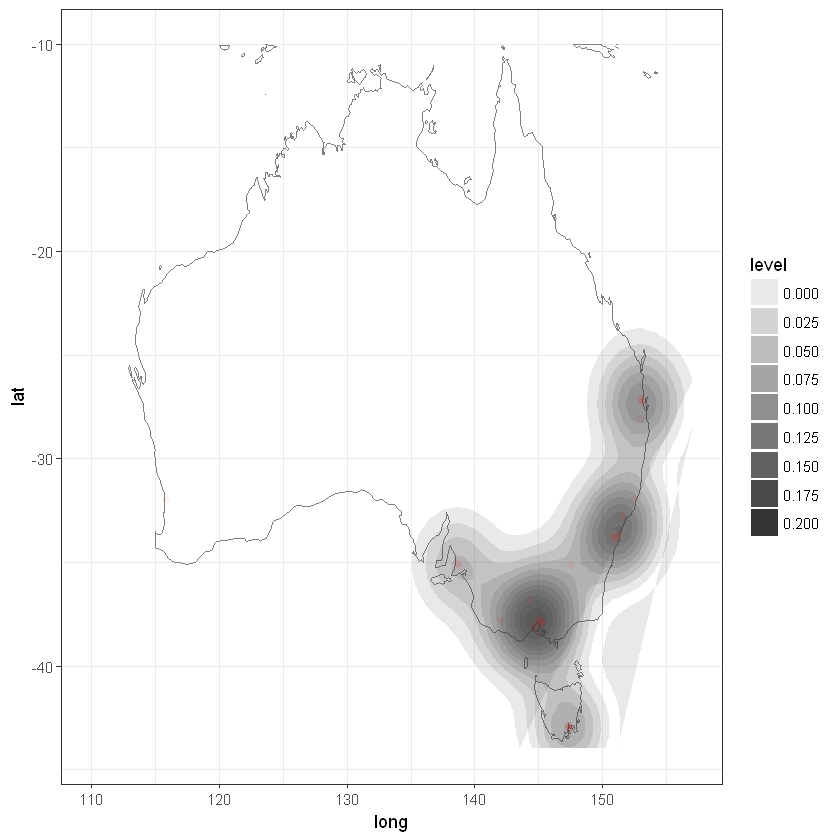

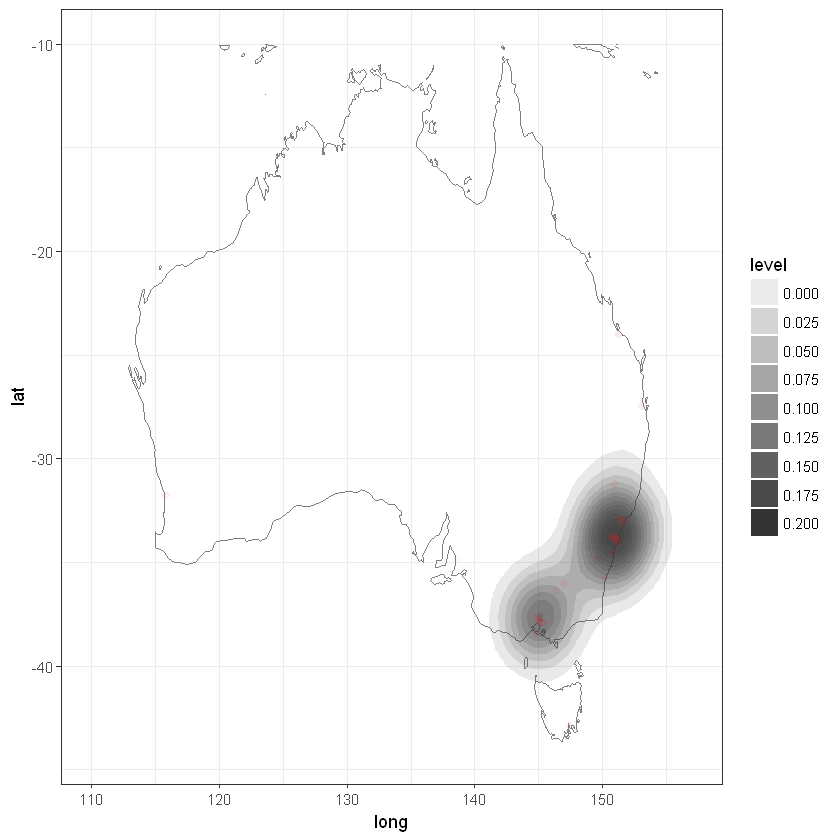

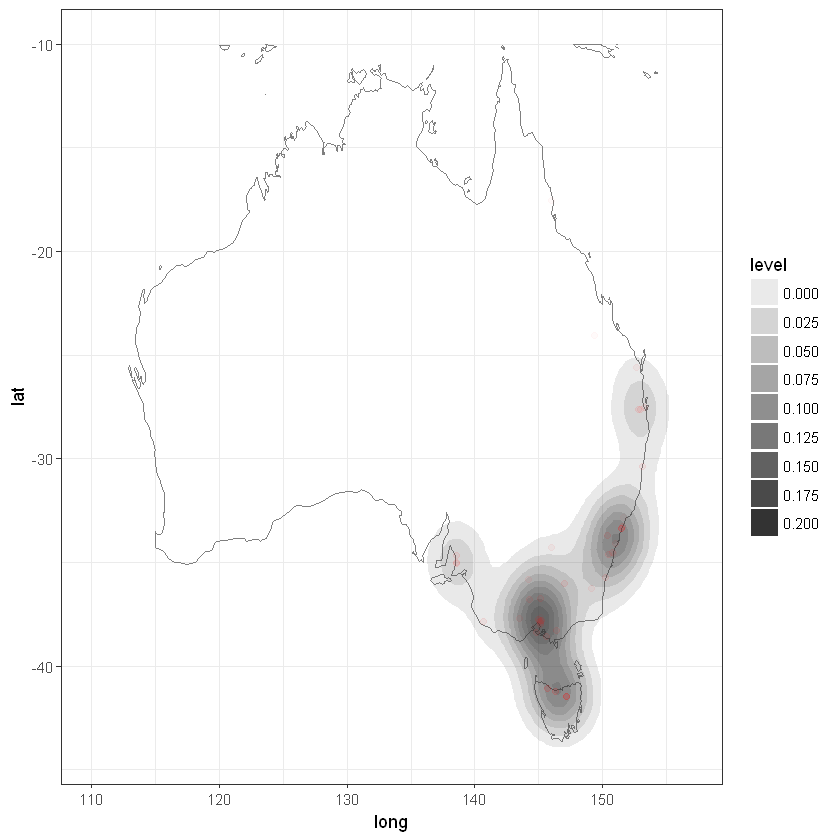

Warning message:
"Removed 3 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 3 rows containing missing values (geom_point)."

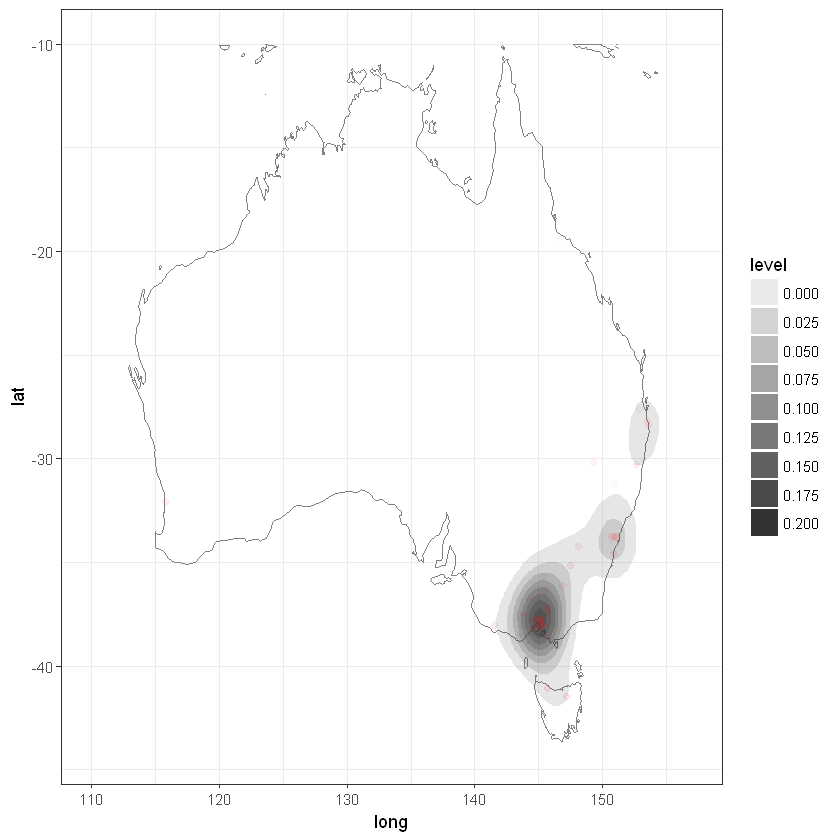

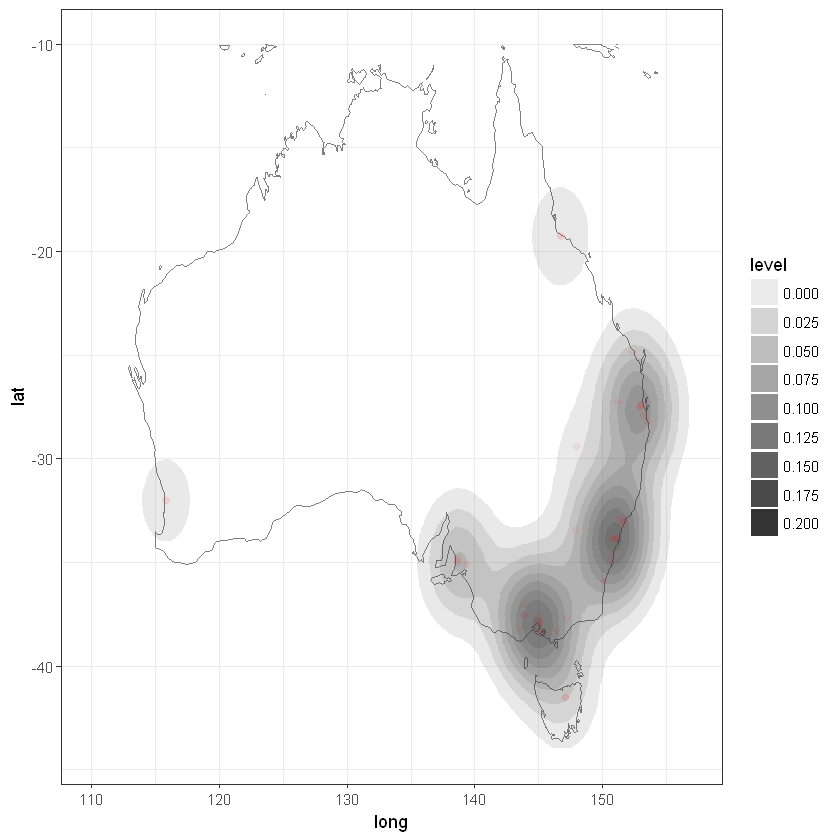

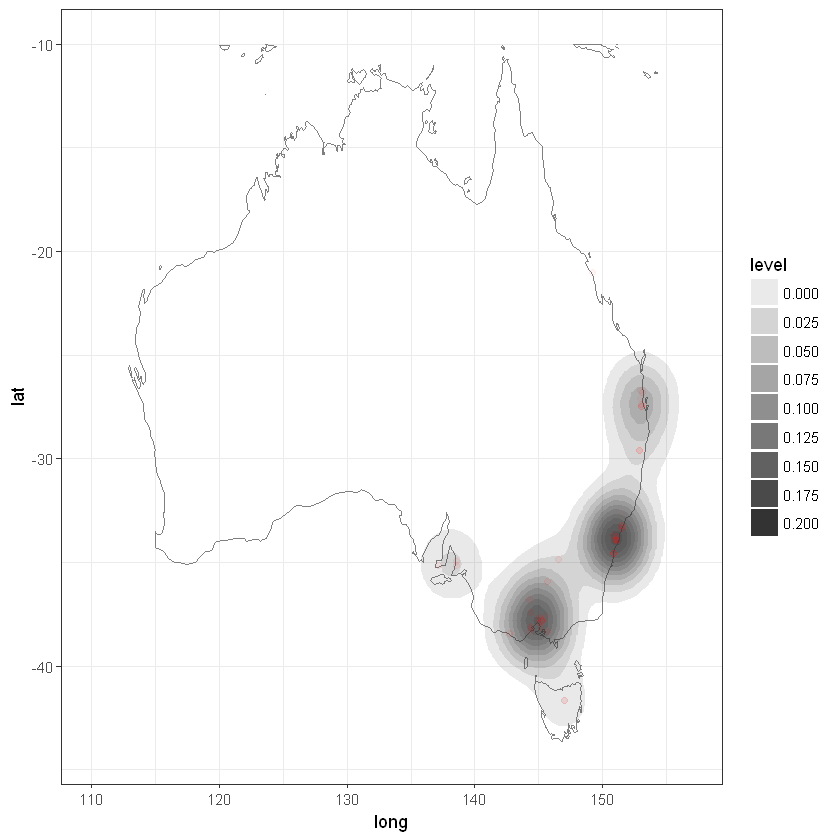

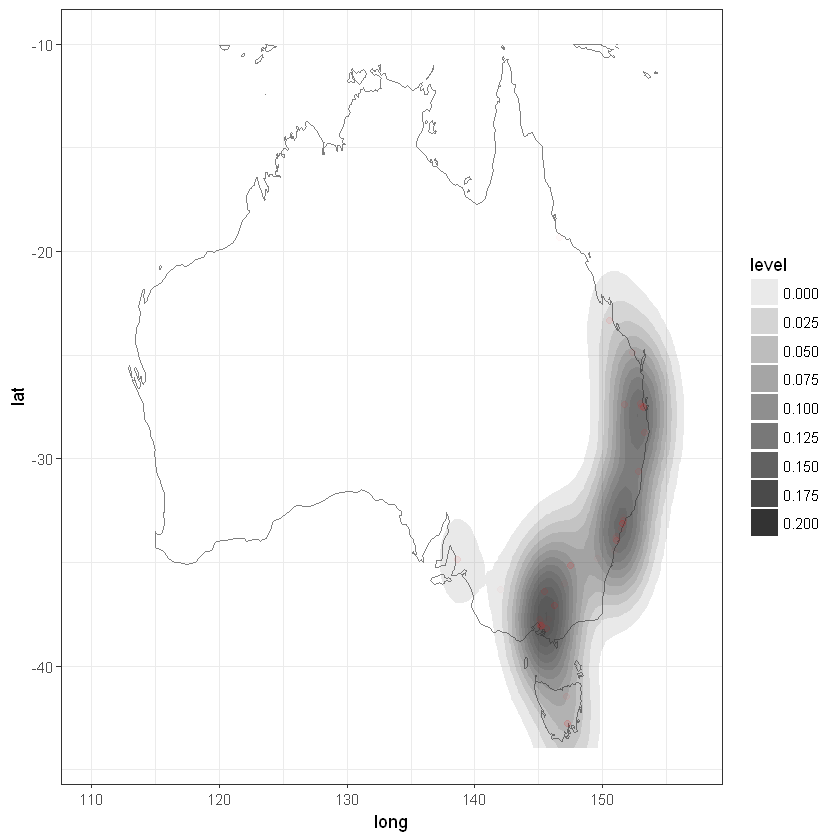

Warning message:
"Removed 3 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 3 rows containing missing values (geom_point)."

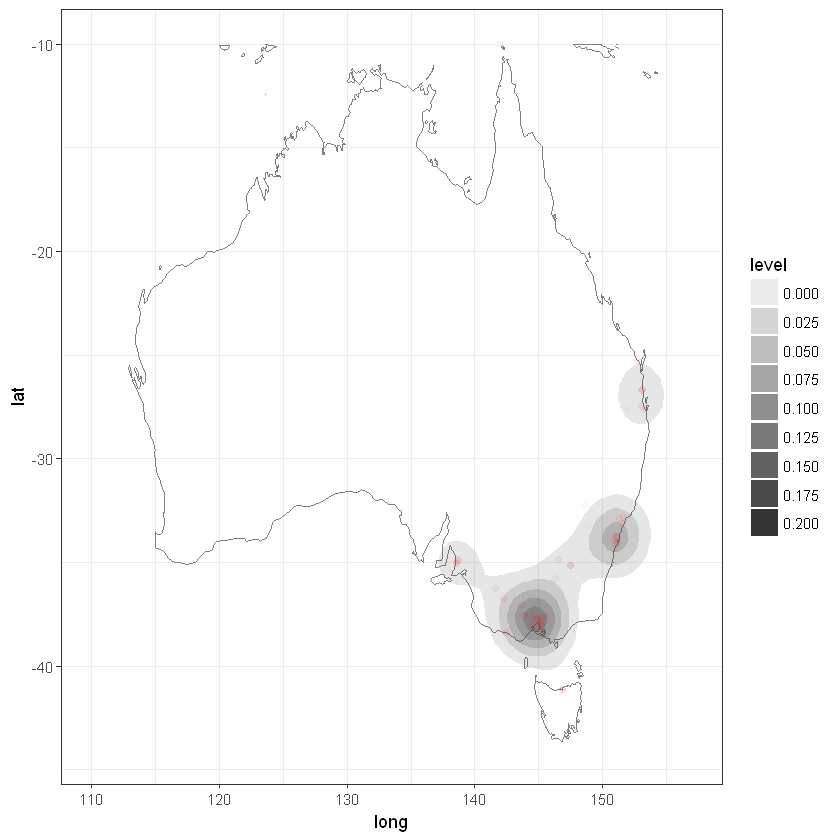

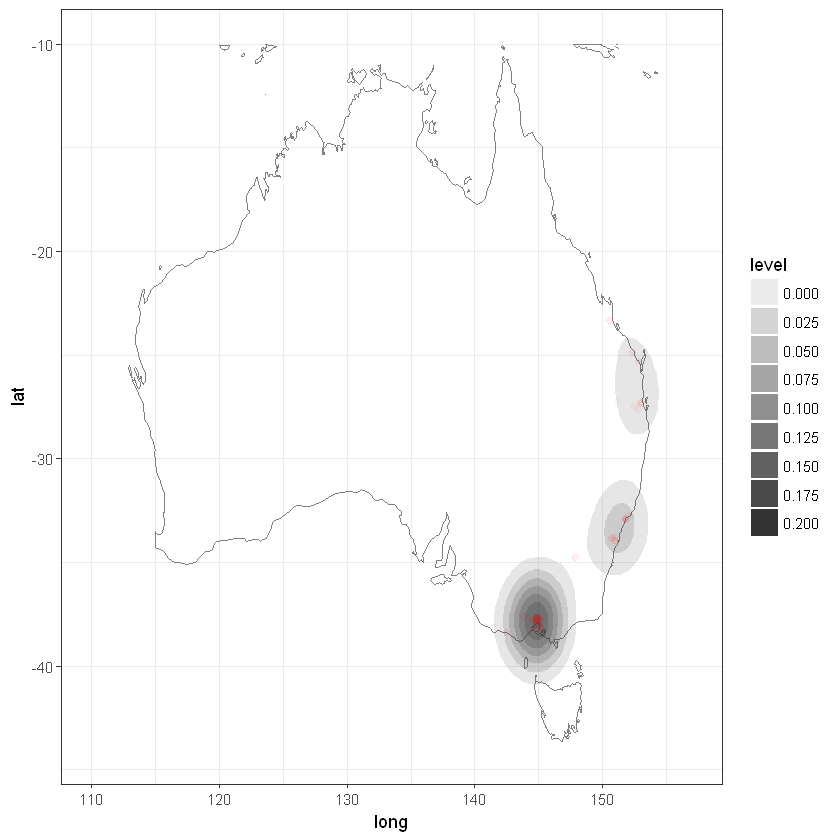

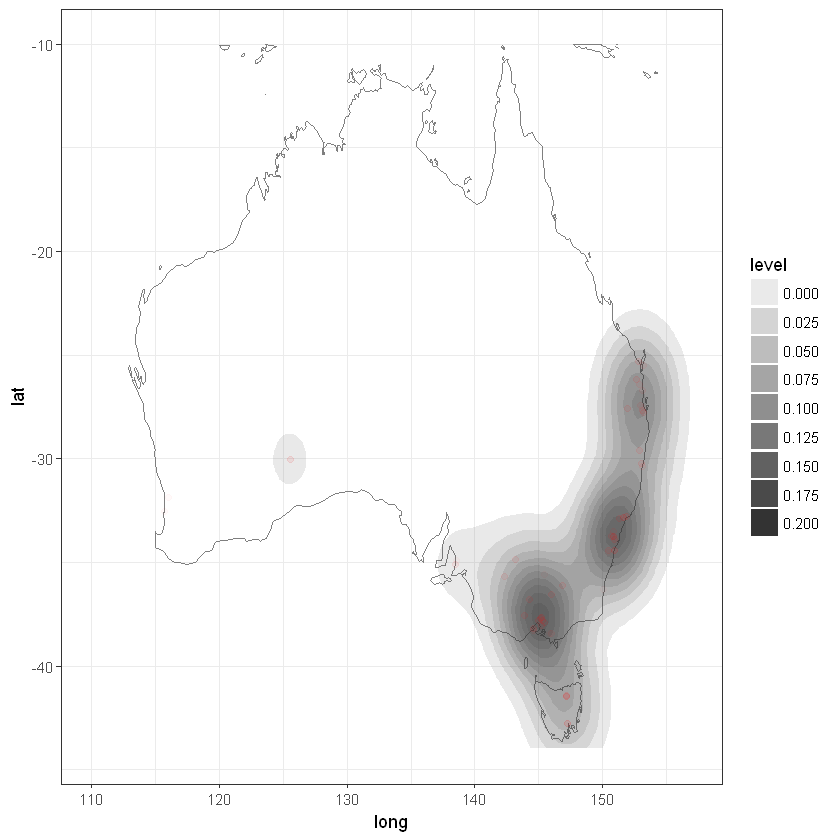

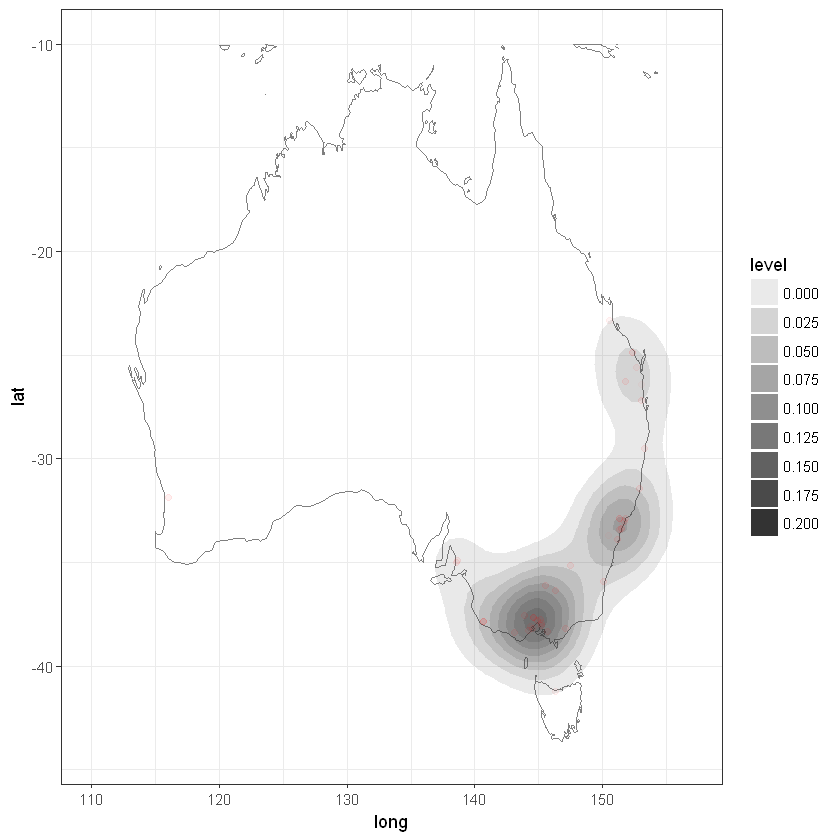

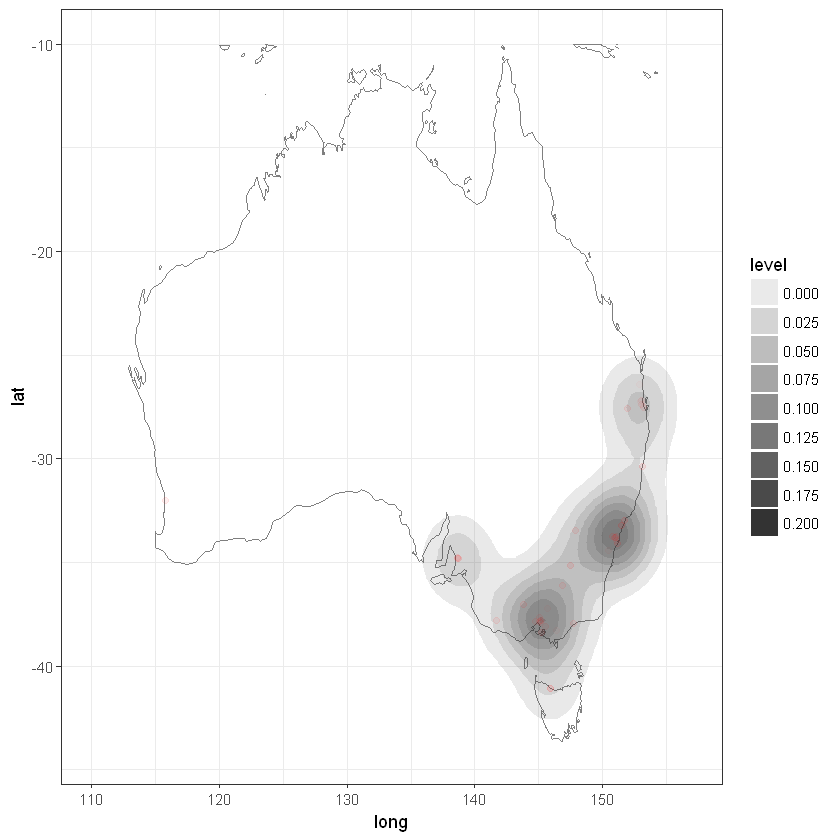

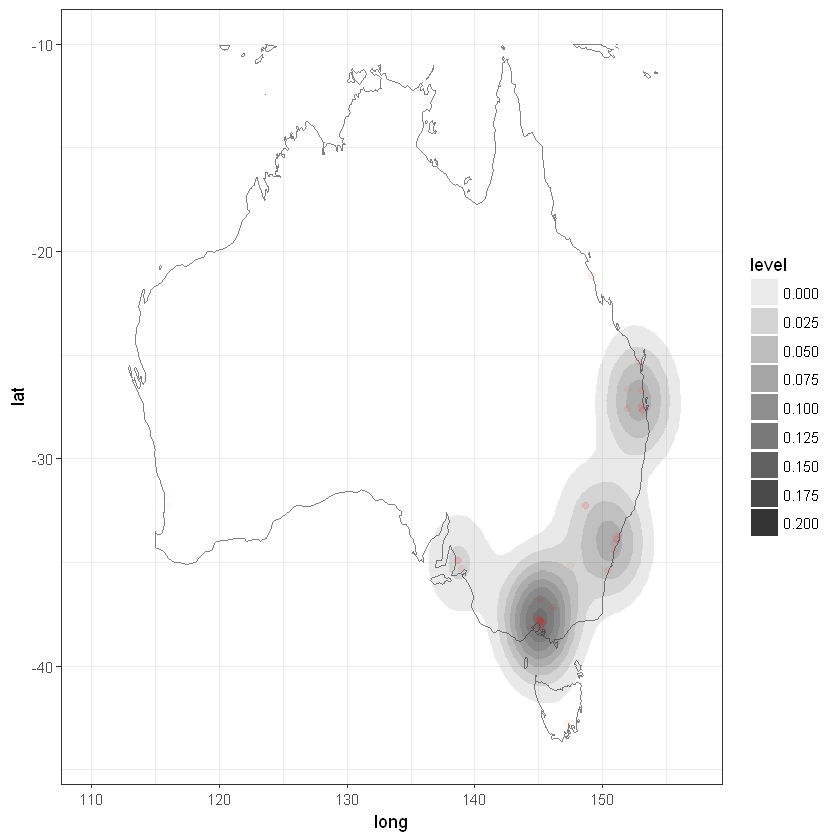

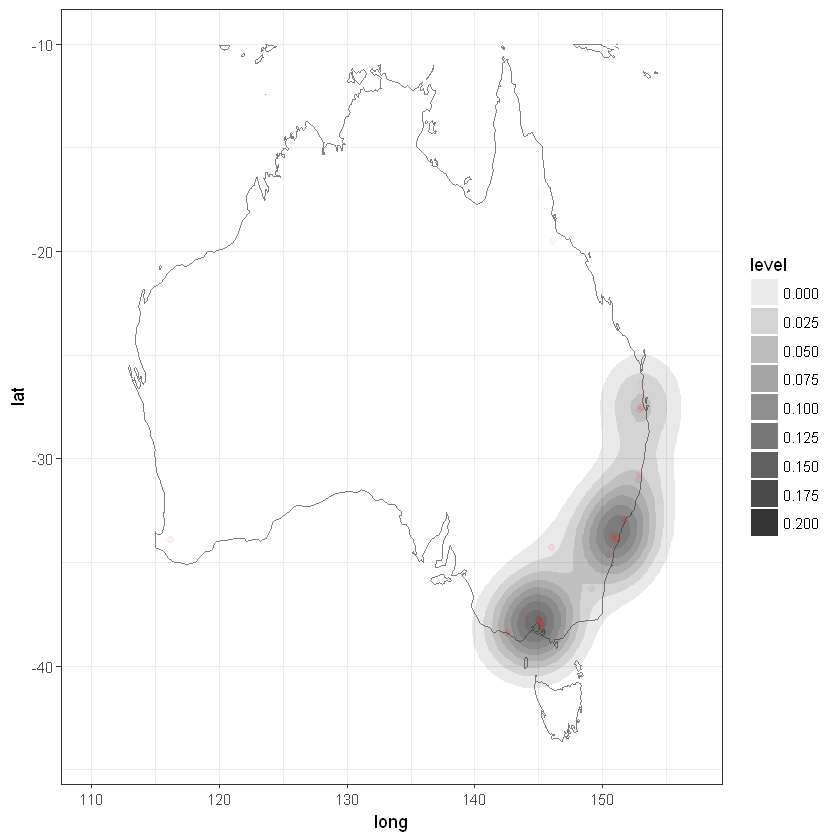

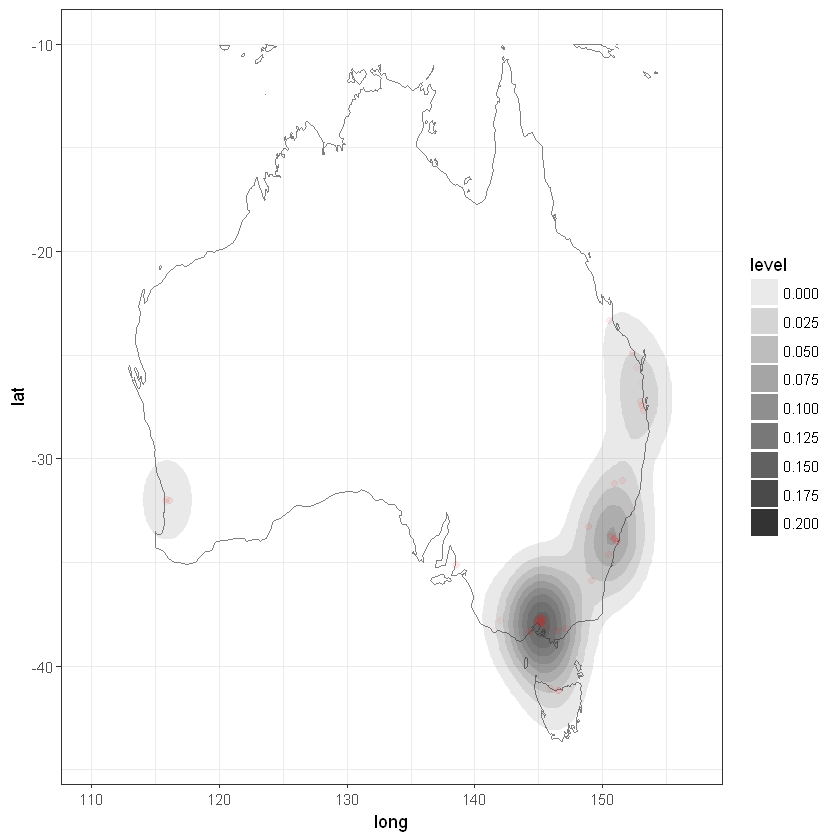

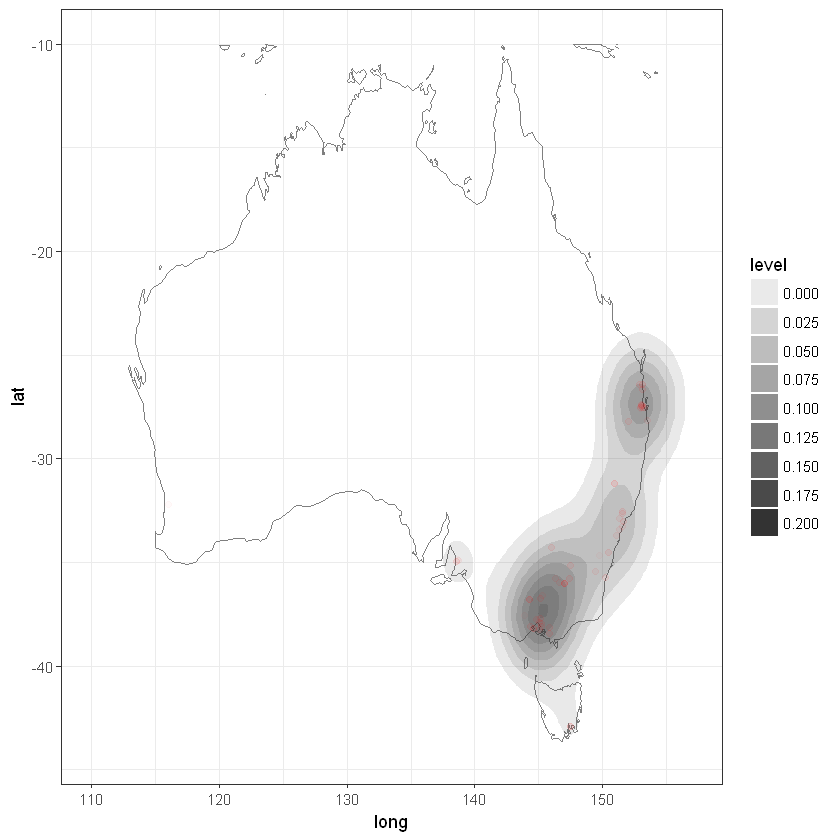

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]


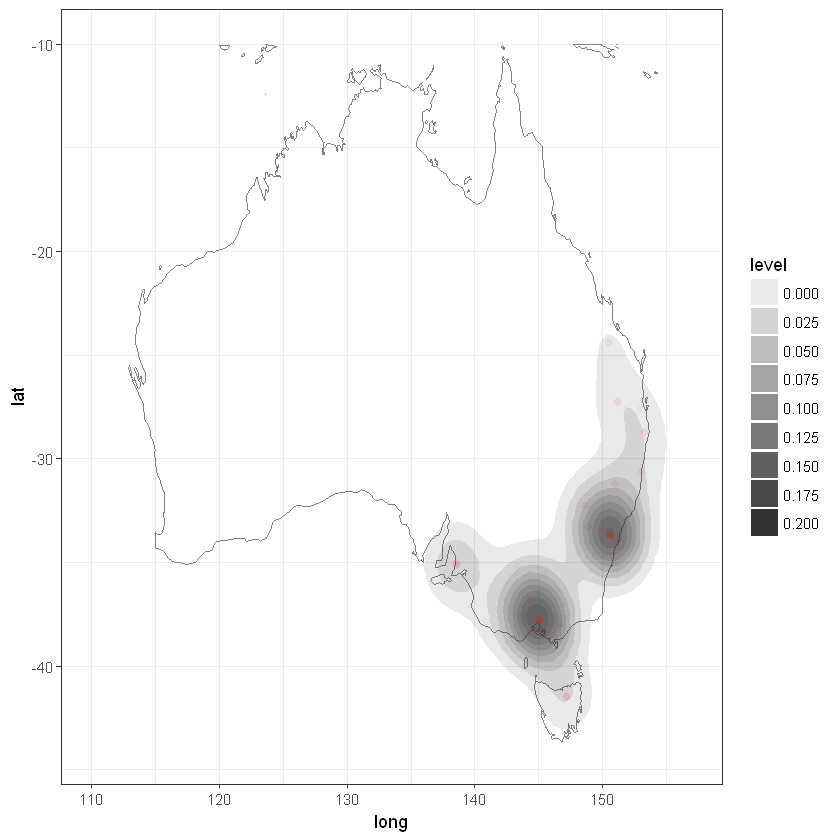

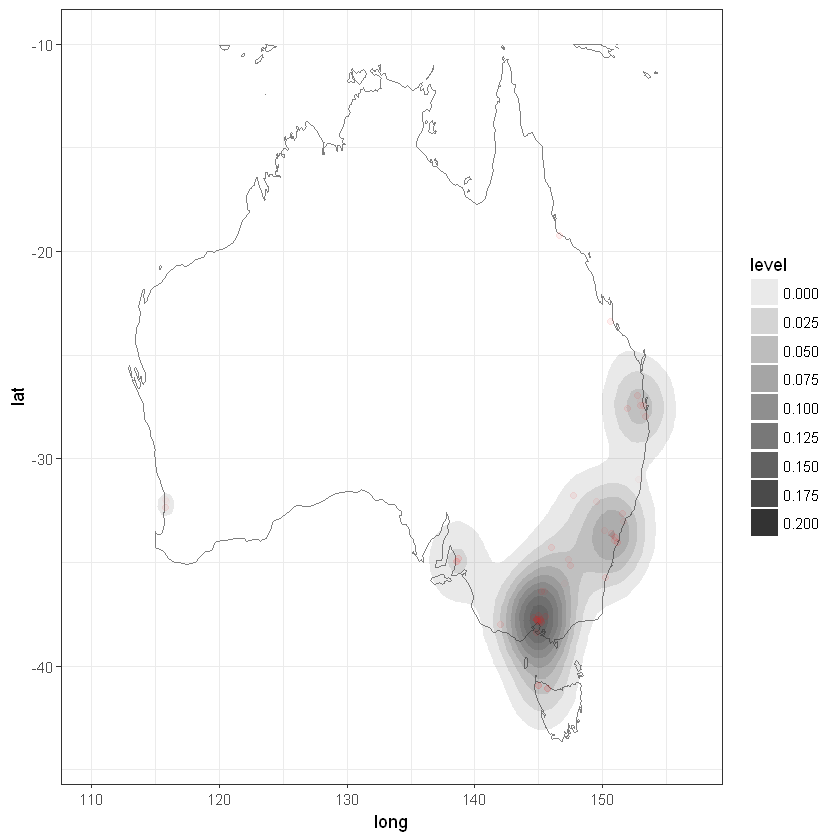

In [71]:
lapply(lapply(X = 1:26, addWeeks), PlotAntibioticDensityForWeek)